# WeatherPy
----



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
from pprint import pprint


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

594


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# url  and unit variables

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# empyt lists

city_name = []
city_id = []
cloudiness = []
country = []
date = []
humidity = []
lats = []
lngs = []
temp = []
windspeed = []

# loop through cities and perform request for data
cities = cities[0:50] #delete this line after done debugging
i = 1
for city in cities:
    city = city
    
    response = requests.get(query_url + city).json()
   
    
    try:
        
        city_name.append(response["name"])
        city_id.append(response["id"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lats.append(response["coord"]["lat"])
        lngs.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        windspeed.append(response["wind"]["speed"]) 
        i+=1
        #print(f"City: {city}, City ID: {response["id"]}")
        #print(response["id"])
        id = response["id"]
        print(f"City: {city}, City ID: {id}")
    
        
    except (KeyError):
        print("City not found...")


City not found...
City: saint anthony, City ID: 5044290
City: vestmanna, City ID: 2610343
City: albany, City ID: 5106841
City: east london, City ID: 1006984
City not found...
City: yellowknife, City ID: 6185377
City: tiksi, City ID: 2015306
City: chuy, City ID: 3443061
City: tres de maio, City ID: 3446130
City: rikitea, City ID: 4030556
City: nikolskoye, City ID: 546105
City: guerrero negro, City ID: 4021858
City: hobart, City ID: 2163355
City: pevek, City ID: 2122090
City: ushuaia, City ID: 3833367
City: provideniya, City ID: 4031574
City: mataura, City ID: 6201424
City: georgetown, City ID: 1735106
City: elko, City ID: 5703673
City: inirida, City ID: 3671450
City: punta arenas, City ID: 3874787
City: castro, City ID: 3466704
City: marystown, City ID: 6067472
City: busselton, City ID: 2075265
City: port alfred, City ID: 964432
City: isangel, City ID: 2136825
City: kemijarvi, City ID: 653272
City: monterey, City ID: 5374376
City: avarua, City ID: 4035715
City: tuktoyaktuk, City ID: 617

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create dataframe of data

weather_df = pd.DataFrame({"City": city_name,
                           "City ID": city_id,
                           "Cloudiness": cloudiness,
                           "Country": country,
                           "Date": date, 
                           "Humidity": humidity, 
                           "Lat": lats, 
                           "Lng": lngs, 
                           "Max Temp": temp, 
                           "Wind Speed": windspeed})

# Export data into .csv

weather_df.to_csv("/Users/anishachaudhari/Desktop/output_files.csv", encoding="utf-8", index=False)

# Display dataframe
weather_df.head(5)



,City,City ID,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Saint Anthony,5044290,0,US,1659387919,39,45.0205,-93.2180,87.15,9.22
1,Vestmanna,2610343,100,FO,1659387919,87,62.1564,-7.1664,49.12,6.91
2,Albany,5106841,94,US,1659387641,51,42.6001,-73.9662,86.18,1.99
3,East London,1006984,51,ZA,1659387920,68,-33.0153,27.9116,56.37,8.21
4,Yellowknife,6185377,81,CA,1659387783,39,62.4560,-114.3525,66.56,8.01


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
weather_df["Humidity_100"] = weather_df["Humidity"].apply(lambda x : 1 if x > 100 else 0)


In [6]:
# iterate through results for each city in cities if humidity > 100%

filter_criteria = weather_df["Humidity_100"] > 100
fc_df = weather_df[filter_criteria]

print(fc_df.shape)
fc_df

(0, 11)


,City,City ID,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Humidity_100


In [7]:
#  Get the indices of cities that have humidity over 100%.
#  No cities with humidty over 100%
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

weather_humid_df = weather_df[weather_df["Humidity_100"] ==0]


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

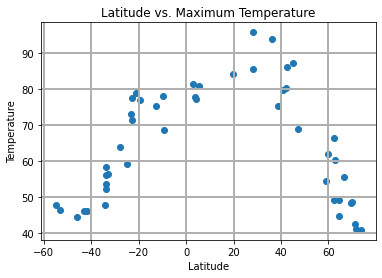

<Figure size 432x288 with 0 Axes>

In [26]:
# Create a Scatter Plot for latitude vs temp

x_values = weather_df["Lat"]
y_values = weather_df["Max Temp"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs. Maximum Temperature")
plt.grid(linestyle='-', linewidth = 2)
plt.show()

plt.savefig("/Users/anishachaudhari/Desktop/output_files/lat_temp.png")

## Latitude vs. Humidity Plot

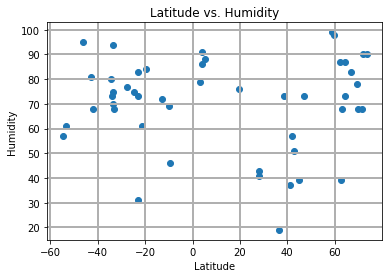

<Figure size 432x288 with 0 Axes>

In [29]:
# Create a Scatter Plot for temperature vs latitude

x_values = weather_df['Lat']
y_values = weather_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Latitude vs. Humidity")
plt.grid(linestyle='-', linewidth = 2)
plt.show()
plt.savefig("/Users/anishachaudhari/Desktop/output_files/lat_humidity.png")

## Latitude vs. Cloudiness Plot

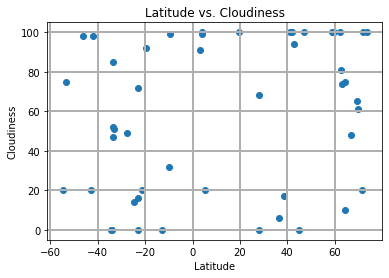

<Figure size 432x288 with 0 Axes>

In [28]:
# Create a Scatter Plot for temperature vs cloudiness

x_values = weather_df['Lat']
y_values = weather_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Latitude vs. Cloudiness")
plt.grid(linestyle='-', linewidth = 2)
plt.show()
plt.savefig("/Users/anishachaudhari/Desktop/output_files/lat_cloudiness.png")

## Latitude vs. Wind Speed Plot

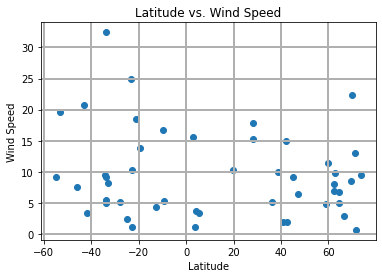

<Figure size 432x288 with 0 Axes>

In [30]:
# Create a Scatter Plot for temperature vs windspeed

x_values = weather_df['Lat']
y_values = weather_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Latitude vs. Wind Speed")
plt.grid(linestyle='-', linewidth = 2)
plt.show()
plt.savefig("/Users/anishachaudhari/Desktop/output_files/lat_windspeed.png")

## Linear Regression

In [12]:
# Create hemispheres

northern_df = weather_df.loc[weather_df["Lat"]>=0]
southern_df = weather_df.loc[weather_df["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

According to Pearson's correlation coefficient guidelines we can gather that in the northern hwmisphere as we move closer to the north pole maximum we should except to see lower max temperatures. the rvalue is -.79 which is close to 
-1 and therefore the negative correlation is strong.

y = -0.6x +94.76
The r-value is: -0.7854274873737878


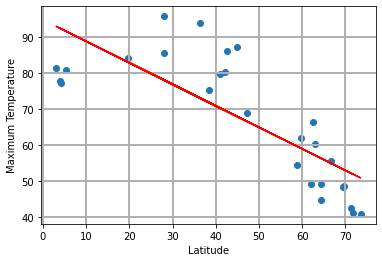

<Figure size 432x288 with 0 Axes>

In [32]:
# Perform a linear regression on temperature vs. latitude
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)


# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.grid(linestyle='-', linewidth = 2)

# Print r value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()
plt.savefig("/Users/anishachaudhari/Desktop/output_files/maxtemp_lat_north.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In the southern hemisphere the data analysis shows a Pearson correlation coefficient of 0.87, indicating a 
strong positive reletionship between increases in latitude and maximum temperatures. 


y = 0.85x +86.56
The r-value is: 0.873644027558889


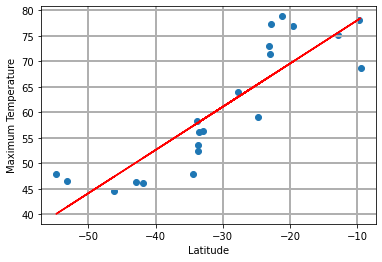

<Figure size 432x288 with 0 Axes>

In [36]:
# Perform a linear regression on temperature vs. latitude
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)


# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.grid(linestyle='-', linewidth = 2)

# Print r value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()
plt.savefig("/Users/anishachaudhari/Desktop/output_files/maxtemp_lat_south")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

When analyzing humidity levels and latitude using data from the northern hemisphere we obtain an r-value of 0.095,
which is close to zero and therefore indicating there is a weak positive correlation between those variables. 
As we increase our latitude in the northern hemisphere the data shows it does not effect humidity levels.

y = 0.09x +65.58
The r-value is: 0.09547511139463995


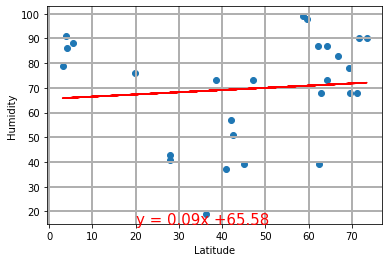

<Figure size 432x288 with 0 Axes>

In [35]:
# Perform a linear regression on humidity vs. latitude
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)


# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.grid(linestyle='-', linewidth = 2)

# Print r value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()
plt.savefig("/Users/anishachaudhari/Desktop/output_files/humidity_lat_north.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

When analyzing humidity levels and latitude using data from the southern hemisphere we obtain an r-value of -0.18,
which is close to zero and therefore indicating there is a weak negative correlation between those variables. 
As we increase our latitude in the southern hemisphere the data shows it does not effect humidity levels.

y = -0.21x +64.85
The r-value is: -0.17995183862777012


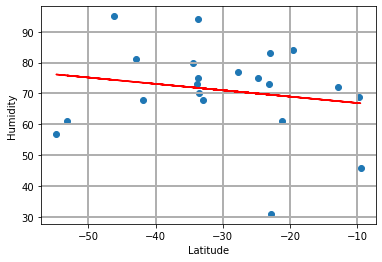

<Figure size 432x288 with 0 Axes>

In [37]:
# Perform a linear regression on humidity vs. latitude
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)


# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.grid(linestyle='-', linewidth = 2)

# Print r value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()
plt.savefig("/Users/anishachaudhari/Desktop/output_files/humidity_lat_south.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value obtained for data from the northern hemisphere is very close to zero indicating there is no correlation 
with latitude increases and cloudiness.  The r-value was a mere .0002.

y = 0.0x +67.73
The r-value is: 0.00020526260127591998


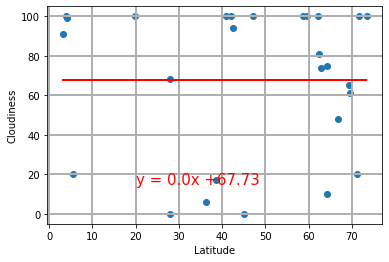

<Figure size 432x288 with 0 Axes>

In [38]:
# Perform a linear regression on humidity vs. latitude
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)


# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.grid(linestyle='-', linewidth = 2)

# Print r value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()
plt.savefig("/Users/anishachaudhari/Desktop/output_files/cloudiness_lat_north.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value obtained for data from the southern hemisphere is close to zero indicating there is weak negative
correlation with latitude increases and cloudiness.  The r-value is -0.131.

y = -0.37x +33.63
The r-value is: -0.13078006870426562


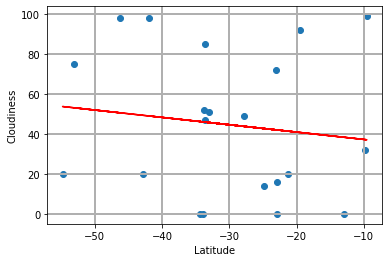

<Figure size 432x288 with 0 Axes>

In [39]:
# Perform a linear regression on humidity vs. latitude
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)


# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.grid(linestyle='-', linewidth = 2)

# Print r value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()
plt.savefig("/Users/anishachaudhari/Desktop/output_files/cloudiness_lat_north.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

When analyzing wind speed and latitude using data from the northern hemisphere we obtain an r-value of 0.050,
which is close to zero and therefore indicating there is no correlation between those variables. 
As we increase our latitude in the northern hemisphere the data shows it does not effect wind speeds.

y = 0.01x +7.85
The r-value is: 0.049753255603441605


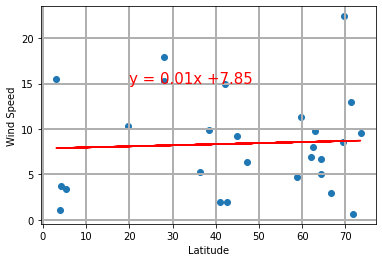

<Figure size 432x288 with 0 Axes>

In [40]:
# Perform a linear regression on humidity vs. latitude
x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)


# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.grid(linestyle='-', linewidth = 2)

# Print r value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()
plt.savefig("/Users/anishachaudhari/Desktop/output_files/windspeed_lat_north.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

When analyzing wind speed and latitude using data from the southern hemisphere we obtain an r-value of -0.098,
which is close to zero and therefore indicating there is a weak negative correlation between those variables. 
As we increase our latitude in the southern hemisphere the data shows it does not effect wind speeds.

y = -0.06x +9.19
The r-value is: -0.09787667326688335


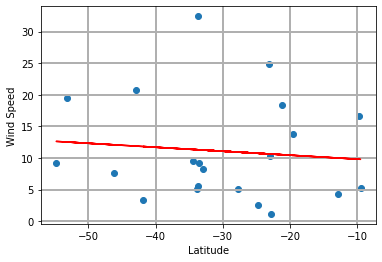

<Figure size 432x288 with 0 Axes>

In [42]:
# Perform a linear regression on humidity vs. latitude
x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)


# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.grid(linestyle='-', linewidth = 2)

# Print r value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()
plt.savefig("/Users/anishachaudhari/Desktop/output_files/windspeed_lat_south.png")